# INITIAL FORAY INTO INSURANCE DATA

In [1]:
#data from this kaggle comp.: https://www.kaggle.com/c/homesite-quote-conversion
#I NEED TO ADD MORE COMMENTS, I KNOW!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
##check out tutorial here:
##http://nbviewer.ipython.org/github/jvns/pandas-cookbook/blob/v0.1/cookbook/Chapter%201%20-%20Reading%20from%20a%20CSV.ipynb
df_train = pd.read_csv('train.csv')
print np.shape(df_train)
df_train.head()

(260753, 299)


,QuoteNumber,Original_Quote_Date,QuoteConversion_Flag,Field6,Field7,Field8,Field9,Field10,Field11,Field12,...,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64
0,1,2013-08-16,0,B,23,0.9403,0.0006,965,1.0200,N,...,9,9,-1,8,-1,18,-1,10,N,CA
1,2,2014-04-22,0,F,7,1.0006,0.0040,548,1.2433,N,...,10,10,-1,11,-1,17,-1,20,N,NJ
2,4,2014-08-25,0,F,7,1.0006,0.0040,548,1.2433,N,...,15,18,-1,21,-1,11,-1,8,N,NJ
3,6,2013-04-15,0,J,10,0.9769,0.0004,"1,165",1.2665,N,...,6,5,-1,10,-1,9,-1,21,N,TX
4,8,2014-01-25,0,E,23,0.9472,0.0006,"1,487",1.3045,N,...,18,22,-1,10,-1,11,-1,12,N,IL


In [2]:
##CHOOSE A SUBSET TO WORK WITH INITIALLY
df_train = df_train[0:10000]
df_train.head()

,QuoteNumber,Original_Quote_Date,QuoteConversion_Flag,Field6,Field7,Field8,Field9,Field10,Field11,Field12,...,GeographicField59A,GeographicField59B,GeographicField60A,GeographicField60B,GeographicField61A,GeographicField61B,GeographicField62A,GeographicField62B,GeographicField63,GeographicField64
0,1,2013-08-16,0,B,23,0.9403,0.0006,965,1.0200,N,...,9,9,-1,8,-1,18,-1,10,N,CA
1,2,2014-04-22,0,F,7,1.0006,0.0040,548,1.2433,N,...,10,10,-1,11,-1,17,-1,20,N,NJ
2,4,2014-08-25,0,F,7,1.0006,0.0040,548,1.2433,N,...,15,18,-1,21,-1,11,-1,8,N,NJ
3,6,2013-04-15,0,J,10,0.9769,0.0004,"1,165",1.2665,N,...,6,5,-1,10,-1,9,-1,21,N,TX
4,8,2014-01-25,0,E,23,0.9472,0.0006,"1,487",1.3045,N,...,18,22,-1,10,-1,11,-1,12,N,IL


<h2>WE FIRST DEAL WITH MISSING VALUES</h2>

In [3]:
#DEAL WITH MISSING VALUES HERE:
#df_train = df_train[1:1000]
#see here: http://scikit-learn.org/stable/modules/preprocessing.html#imputation
from sklearn.decomposition import PCA #import principal component analysis
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import scale
df_train_nt = df_train.drop('QuoteConversion_Flag', 1)
#http://fastml.com/converting-categorical-data-into-numbers-with-pandas-and-scikit-learn/
df_hot = pd.get_dummies(df_train_nt)
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(df_hot)
df_hot_imp = imp.transform(df_hot)

<h2>NOW WE'RE GOING TO DO SOME DIMENSIONALITY REDUCTION IN ORDER TO VISUALIZE THE PRINCIPAL COMPONENTS</h2>

In [4]:
pca = PCA(n_components=2) #Instantiate the model & set parameters
pca.fit(scale(df_hot_imp)); #Fit the model
df_pca = pca.transform(scale(df_hot_imp))#Apply the model. For embeddings / decompositions, this is transform.
print(df_pca.shape)

(10000, 2)


The amount of variance explained by the 1st & 2nd principal components are 0.032 & 0.018 respectively.


/Users/hugobowne-anderson/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


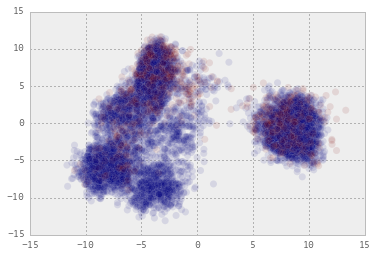

In [5]:
plt.scatter(df_pca[:, 0], df_pca[:, 1] , c = df_train['QuoteConversion_Flag'] , s = 50 , alpha=0.1);
print("The amount of variance explained by the 1st & 2nd principal components are %s & %s respectively." 
      % (round(pca.explained_variance_ratio_[0],3) , round(pca.explained_variance_ratio_[1],3)))

In [8]:
###DON'T WORRY ABOUT THIS CELL FOR THE TIME BEING!
dff = df_hot.ix[:,1:4] #http://stackoverflow.com/questions/11285613/selecting-columns
dff.head()

,Field7,Field8,Field9
0,23,0.9403,0.0006
1,7,1.0006,0.0040
2,7,1.0006,0.0040
3,10,0.9769,0.0004
4,23,0.9472,0.0006


In [6]:
from mpl_toolkits.mplot3d import Axes3D
pca3d = PCA(n_components=3) #Instantiate the model & set parameters
pca3d.fit(scale(df_hot_imp)); #Fit the model
df_pca = pca3d.transform(scale(df_hot_imp))#Apply the model. For embeddings / decompositions, this is transform.
print(df_pca.shape)

(10000, 3)


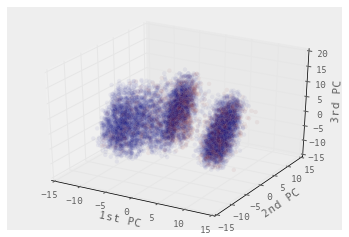

In [7]:
#http://pythonprogramming.net/matplotlib-3d-scatterplot-tutorial/
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:,2], c = df_train['QuoteConversion_Flag'], alpha=0.05)
ax.set_xlabel('1st PC')
ax.set_ylabel('2nd PC')
ax.set_zlabel('3rd PC')
plt.show()

In [ ]:
#next: remove outliers and check out PCA then.

<h2>Scale and normalize the data here</h2>

In [8]:
df = scale(df_hot_imp) #scaled data
np.shape(df)

(10000, 1438)

<h2>SPLIT DATA INTO TRAINING AND TEST SETS</h2>

In [9]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df_train['QuoteConversion_Flag'], test_size = 0.1, 
                                                    random_state=0)
print("X_train shape: %s" % repr(X_train.shape))
print("y_train shape: %s" % repr(y_train.shape))
print("X_test shape: %s" % repr(X_test.shape))
print("y_test shape: %s" % repr(y_test.shape))

X_train shape: (9000, 1438)
y_train shape: (9000,)
X_test shape: (1000, 1438)
y_test shape: (1000,)


/Users/hugobowne-anderson/repos/scikit-learn/sklearn/cross_validation.py:42: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<h2>LET'S TRY A LINEAR SVM WITH K-FOLD CROSS VALIDATION</h2>

/Users/hugobowne-anderson/repos/scikit-learn/sklearn/grid_search.py:43: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:  4.6min


Fitting 10 folds for each of 6 candidates, totalling 60 fits
{'C': 0.001}
0.891111111111


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  6.9min finished


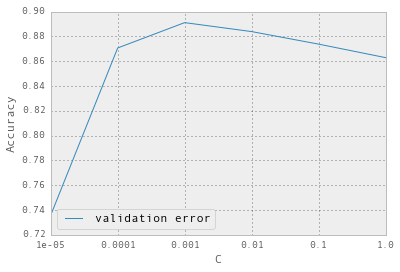

In [10]:
from sklearn.svm import LinearSVC
svm = LinearSVC() # Instantiate the model.
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
#also see here: http://scikit-learn.org/stable/auto_examples/grid_search_digits.html
svm = LinearSVC() # Instantiate the model
tuned_parameters = {'C':10.**np.arange(-5,1)}
grid_search = GridSearchCV( svm , param_grid = tuned_parameters , cv = 10 ,verbose = 1 )
grid_search.fit(X_train, y_train);
print(grid_search.best_params_)
print(grid_search.best_score_)
##see here about the scoring:
##http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
##E.g. gives "accuracy" for SVMs:
##http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
plt.plot([c.mean_validation_score for c in grid_search.grid_scores_], label="validation error")
plt.xticks(np.arange(6), tuned_parameters['C']); plt.xlabel("C"); plt.ylabel("Accuracy");plt.legend(loc='best');
#see this thread concerning mean_training_score:
#http://stackoverflow.com/questions/23389334/how-to-calculate-the-mean-training-score-using-gridsearchcv-in-scikit-learns

<h2>LET'S TRY A GAUSSIAN SVM WITH K-FOLD CROSS VALIDATION</h2>

[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed: 51.8min
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 98.2min finished


Fitting 10 folds for each of 8 candidates, totalling 80 fits
{'C': 10.0}
0.872777777778


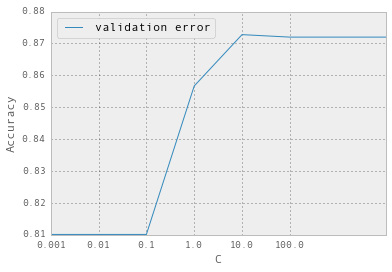

In [12]:
from sklearn.svm import SVC
svm1 = SVC(kernel='rbf')# Instantiate the model (SVM w/ Gaussian kernel)
tuned_parameters = {'C':10.**np.arange(-3,5)}
grid_search1 = GridSearchCV( svm1 , param_grid = tuned_parameters , cv = 10 ,verbose = 1 )
grid_search1.fit(X_train, y_train);
print(grid_search1.best_params_)
print(grid_search1.best_score_)
plt.plot([c.mean_validation_score for c in grid_search1.grid_scores_], label="validation error")
plt.xticks(np.arange(6), tuned_parameters['C']); plt.xlabel("C"); plt.ylabel("Accuracy");plt.legend(loc='best');

<h2>LET'S TRY A RANDOM FOREST WITH K-FOLD CROSS VALIDATION</h2>

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'n_estimators': 50}
0.872333333333


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.2min finished


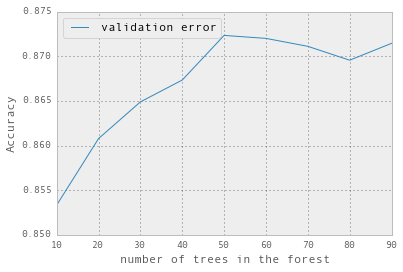

In [11]:
from sklearn.ensemble import RandomForestClassifier
#a random forest builds many randomized decision trees and averages their results.
rf = RandomForestClassifier() #Instantiate the model.
tuned_parameters = {'n_estimators':10*np.arange(1,10)}
grid_search2 = GridSearchCV( rf , param_grid = tuned_parameters , cv = 5 ,verbose = 1 )
grid_search2.fit(X_train, y_train);
print(grid_search2.best_params_)
print(grid_search2.best_score_)
plt.plot([c.mean_validation_score for c in grid_search2.grid_scores_], label="validation error")
plt.xticks(np.arange(9), tuned_parameters['n_estimators']); 
plt.xlabel("number of trees in the forest"); plt.ylabel("Accuracy");plt.legend(loc='best');